<a href="https://colab.research.google.com/github/danysc/DA-Projects/blob/main/Heart_Disease_UCI_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease UCI- EDA

https://www.kaggle.com/ronitf/heart-disease-uci

Exploratory Analysis
There are thirteen features and one target as below:

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical * * angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure
   (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement: 
   (0 = normal, 1 = having * ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment 
    (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia 
  (3 = normal; 6 = fixed defect; 7 = reversable defect)  
* **target**: Heart disease (0 = no, 1 = yes)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the csv from my GitHub:
df= pd.read_csv('https://raw.githubusercontent.com/danysc/kgdata/main/heart.csv')
# Printing the first 6 rows of the data frame for visualization
df[:6]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


### Specific Notebook Parameters

In [ ]:
# matplotlib.pyplot
pd.set_option('max_colwidth', 400)
plt.style.use('ggplot')

# Data Processing

### The dataset size and check Nulls:

In [ ]:
print(df.shape)

(303, 14)


We have 303 persons in this dataset.

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

THere are no Nulls in the dataframe.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Check the data:

### Sample rows:

In [ ]:
df.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1


In [ ]:
# Heatmap for missing data:
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### visualizing some data

Count the poeples that die:

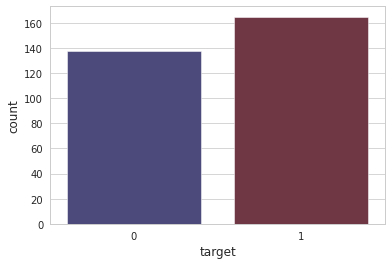

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette="icefire")

**Conclusion**: There are more dead people, but not is big gap.





#### Visualizing data with sex: The person's sex (1 = male, 0 = female)
**target**: Heart disease (0 = no, 1 = yes)

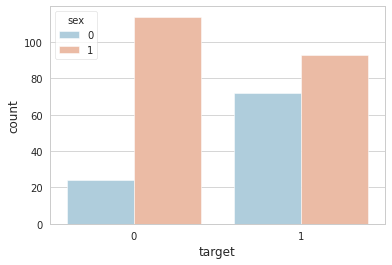

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='sex',data=df,palette='RdBu_r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


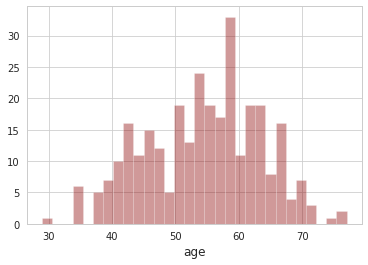

In [ ]:
sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=30)

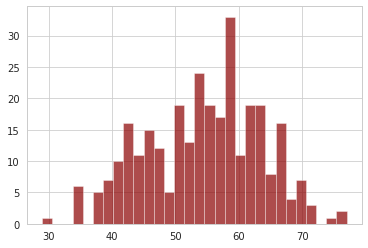

In [ ]:
df['age'].hist(bins=30,color='darkred',alpha=0.7)

## Correlation:

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


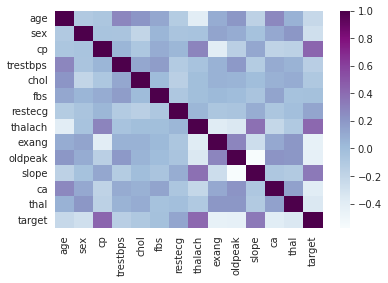

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, cmap = 'BuPu')
# With values:
# sns.heatmap(correlation, cmap = 'BuPu', annot = True)

**Conclusion**: The parameters cp & thatlach are significents.

### Visualizing data with cp:
cp: The chest pain experienced
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

 **target**: Heart disease (0 = no, 1 = yes)

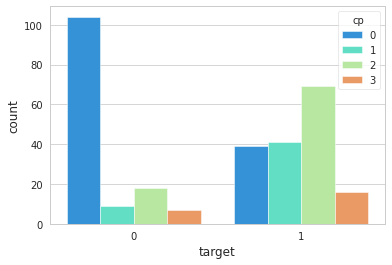

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='cp',data=df,palette='rainbow')

**Conclusion**: The increase of atypical angina causes Heart disease, especially in case that with "non-anginal pain" and "asymptomatic".